# Análise Exploratória Desafio Graph Missing Edges
-   Dados:

    -   Node attributes:
    
        -   id - numeric id of node

        -   label - alphanumeric id of a node - venue id

        -   latitude - venue latitude

        -   longitude - venue longitude

        -   reviewCount - venue review count

        -   categories - ids of venue categories. Their names can be found in a separated file: categories.csv

        -   name - venue name

        -   stars - venue star number

    -   Edge atributes:

        -   weight - number of times a certain edge was created
        
    -   Categories:

        -   CategoryId - numeric id of a category

        -   names - category name

## Bibliotecas

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline

# Leitura de Arquivos e Tratamento de Dados

In [3]:
G = nx.read_gml("./../data/GraphMissingEdges.gml")

In [4]:
categories_nodes = nx.get_node_attributes(G,'categories')
for key in categories_nodes:
    categories_nodes[key] = categories_nodes[key].split(',')

In [5]:
categories_df = pd.read_csv('./../data/categories.csv', sep=',')
categories_df = categories_df.set_index('CategoryId')

In [6]:
for node in G.nodes:
    categories = categories_nodes[node]
    categories_names = []
    for category in categories:
        if category != '':
            categories_names.append(categories_df.loc[int(category)]['names'])
    nx.set_node_attributes(G, {node: categories_names}, 'categories_names')

In [7]:
for node in G.nodes:
    print(G.nodes[node]['name'], G.nodes[node]['categories_names'])
    print(G.degree(node))
    print('------------------')

Cafe Fifth Ave ['Restaurants', 'Cafes']
2
------------------
Good Fellas Barber Shop ['Beauty & Spas', 'Barbers']
2
------------------
Tightspot Dancewear Center ['Shopping', 'Arts & Crafts', 'Shoe Stores', 'Costumes', 'Fashion']
1
------------------
Evolve Wellness Spa Shadyside ['Day Spas', 'Beauty & Spas', 'Health & Medical', 'Acupuncture', 'Massage Therapy', 'Massage']
17
------------------
Nova Dental Associates ['Orthodontists', 'Health & Medical', 'General Dentistry', 'Cosmetic Dentists', 'Oral Surgeons', 'Dentists']
0
------------------
The Saloon of Mt Lebanon ['Nightlife', 'Restaurants', 'Sports Bars', 'Bars', 'American (Traditional)', 'Burgers']
12
------------------
Bagel Factory ['Bakeries', 'Restaurants', 'Bagels', 'Food']
3
------------------
Round Corner Cantina ['Lounges', 'Restaurants', 'Cocktail Bars', 'Mexican', 'Nightlife', 'Bars', 'Dance Clubs']
46
------------------
China Garden ['Chinese', 'Restaurants']
4
------------------
South Side BBQ Company Truck ['Catere

## Coeficiente de Clusterização Geral

In [8]:
print(nx.average_clustering(G))

0.04489358044799767


In [34]:
list_clustering = []

for node in G.nodes:
                list_clustering.append({'name': G.nodes[node]['name'],
                                'Coeficiente de Cluterização': nx.clustering(G, node), 
                                'Grau':G.degree(node)})
print(list_clustering)

[{'name': 'Cafe Fifth Ave', 'Coeficiente de Cluterização': 0, 'Grau': 2}, {'name': 'Good Fellas Barber Shop', 'Coeficiente de Cluterização': 0, 'Grau': 2}, {'name': 'Tightspot Dancewear Center', 'Coeficiente de Cluterização': 0, 'Grau': 1}, {'name': 'Evolve Wellness Spa Shadyside', 'Coeficiente de Cluterização': 0.0761904761904762, 'Grau': 17}, {'name': 'Nova Dental Associates', 'Coeficiente de Cluterização': 0, 'Grau': 0}, {'name': 'The Saloon of Mt Lebanon', 'Coeficiente de Cluterização': 0.15555555555555556, 'Grau': 12}, {'name': 'Bagel Factory', 'Coeficiente de Cluterização': 0, 'Grau': 3}, {'name': 'Round Corner Cantina', 'Coeficiente de Cluterização': 0.12657004830917876, 'Grau': 46}, {'name': 'China Garden', 'Coeficiente de Cluterização': 0, 'Grau': 4}, {'name': 'South Side BBQ Company Truck', 'Coeficiente de Cluterização': 0.14285714285714285, 'Grau': 7}, {'name': '#1 Cochran Nissan - Pittsburgh', 'Coeficiente de Cluterização': 0, 'Grau': 2}, {'name': 'The Foundry Table & Tap',

In [35]:
df_clustering = pd.DataFrame.from_dict(list_clustering)

## Histograma do Grau dos Nós

Text(0.5, 1.0, 'Histograma dos Graus dos Nós')

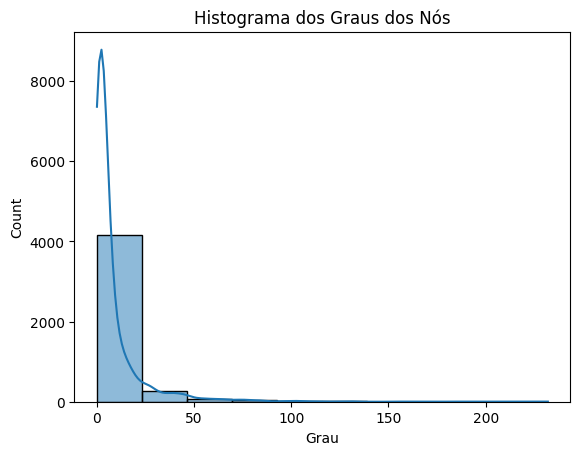

In [36]:
sns.histplot(data=df_clustering, x="Grau", bins=10, kde=True)
plt.title('Histograma dos Graus dos Nós')

## Histograma do Coeficiente de Clusterização

-   O histograma do coeficiente de cluterização indica que a maior parte dos nós possuem 0 de coeficiente.
-   Como o coeficiente de cluterização indica o grau com que os nós de um grafo tendem a se agrupar. Portando grande parte dos nós não terão links entre si. 

<Axes: xlabel='Coeficiente de Cluterização', ylabel='Count'>

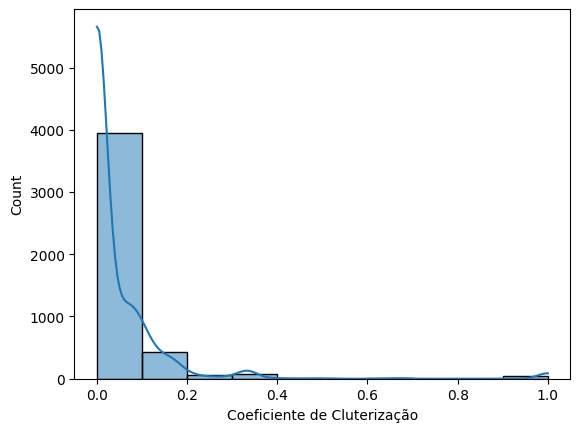

In [37]:
sns.histplot(data=df_clustering, x="Coeficiente de Cluterização", bins=10, kde=True)

## Densidade do Grafo

-   A densidade do grafo indica que o quão é desconexo.

In [13]:
print(f"density: {nx.density(G)}")

density: 0.0018150582646987846


## Visualização dos Edges

-   Analisando os pesos dos edges, é possível notar que grande parte tem peso 1, mas que existem valores altos também para algumas conexões.
-   täkō -----21----- Gaucho Parrilla Argentina: essa é a conexão com maior peso.

In [44]:
# Quais são os nós que possuem arestas com peso maior que 10?
list_peso = []

for v, u in G.edges:
                print(G.nodes[v]['name'] + ' --------------- ' + G.nodes[u]['name'])
                list_peso.append(G.get_edge_data(v,u))
                print(G.get_edge_data(v,u)['weight'])

print(list_peso)
df_pesos = pd.DataFrame.from_dict(list_peso)

Cafe Fifth Ave --------------- Caliente Pizza & Drafthouse
1
Cafe Fifth Ave --------------- Dunkin' Donuts
1
Good Fellas Barber Shop --------------- Taco Bell
1
Good Fellas Barber Shop --------------- Taco Bell
1
Tightspot Dancewear Center --------------- McNeilly Nails
1
Evolve Wellness Spa Shadyside --------------- Uncle Tony's Pizza
1
Evolve Wellness Spa Shadyside --------------- Hello Bistro
1
Evolve Wellness Spa Shadyside --------------- 4121 Main
1
Evolve Wellness Spa Shadyside --------------- Evolve Wellness Spa Shadyside
2
Evolve Wellness Spa Shadyside --------------- Hough's
1
Evolve Wellness Spa Shadyside --------------- Altius
1
Evolve Wellness Spa Shadyside --------------- Condado Tacos
1
Evolve Wellness Spa Shadyside --------------- Hook Fish & Chicken
1
Evolve Wellness Spa Shadyside --------------- Physique Rx'd
1
Evolve Wellness Spa Shadyside --------------- Hurwitz Center for Plastic Surgery
1
Evolve Wellness Spa Shadyside --------------- City Works - Pittsburgh
1
Evolv

In [27]:
weight_agrp = df_pesos. groupby(['weight']).size().reset_index(name='counts')
weight_agrp

,weight,counts
0,1,17584
1,2,1054
2,3,222
3,4,68
4,5,32
5,6,13
6,7,7
7,8,3
8,10,2
9,12,3


<Axes: xlabel='weight', ylabel='counts'>

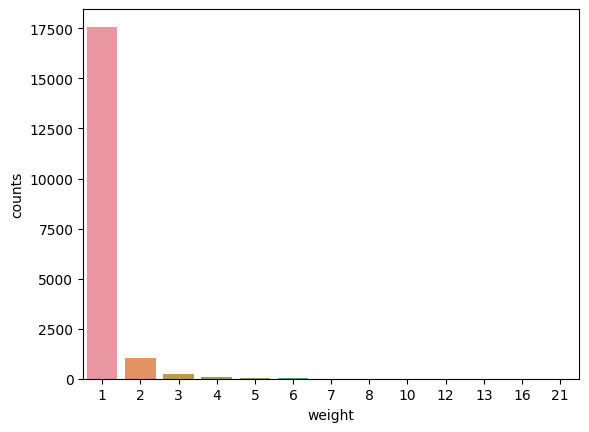

In [39]:
sns.barplot(x=weight_agrp['weight'], y=weight_agrp['counts'])

In [46]:
reviewCount = nx.get_node_attributes(G, "reviewCount")
stars = nx.get_node_attributes(G, "stars")

df_review = pd.DataFrame.from_dict(reviewCount, orient ='index')
df_starts = pd.DataFrame.from_dict(stars, orient ='index')


In [47]:
df_review_stars = pd.concat([df_review, df_starts], axis=1)   

In [48]:
df_review_stars

,0,0
ql0AaBp68ckekxvWOF8xLA,20,3.0
WHxonk9W_sRLk8cwOoZQqQ,12,4.0
P6HDtlj1GSu9UG2Aal2PPg,4,3.0
3kUqNxO1rkDDb89GAfyNgw,95,4.5
v_pED2nMFPsBGD4Tq2ygBw,5,2.0
...,...,...
sw0nkPQvtxLtTyRnr-dt7A,49,2.5
QmTb7f_oeM7o6DLIQ2I2Jg,44,3.5
J9ZkLjaQXo1iNhHdHi71qQ,3,5.0
9IhBQ7mTYajCQtIrEjv5KQ,3,2.0
